Choose your target.</br> Which column in your tabular dataset will you predict?  is_canceled</br></br>
Is your problem regression or classification? Classification</br></br>
How is your target distributed? Imbalanced</br></br>
    Classification: How many classes? 2 Are the classes imbalanced? Yes 63% and 37%</br></br>
    Regression: Is the target right-skewed? If so, you may want to log transform the target.</br></br>
Choose your evaluation metric(s).</br></br>
    Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy? Precision and recall</br></br>
    Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?</br></br>
Choose which observations you will use to train, validate, and test your model.</br></br>
    Are some observations outliers? Will you exclude them?</br></br>
    Will you do a random split or a time-based split? Random Split</br></br>
Begin to clean and explore your data.</br></br>
Begin to choose which features, if any, to exclude. Would some features "leak" future information?

# Define the problem

Can you predict if customer is going to cancel reservation?

What are the busiest months? 

Where do the majority of customers arrive from? (Country) 

Are Individuals or business/agents booking the most rooms?

What days are the most booked?

Is there an increase in bookings annually? Or decline? Or about the same?

Number of Days on waiting list?

How many customers change their reservation before checking in?

In [ ]:
# https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv

In [1]:
%%capture
import sys

# Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = '/content/gdrive/My Drive/Applied Modeling Project/'
    !pip install category_encoders==2.*
    !pip install ydata-profiling==2.*
    !pip install pandas-profiling==2.*

# Local:
else:
    DATA_PATH = '../data/'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Applied Modeling Project

/content/gdrive/My Drive/Applied Modeling Project


In [4]:
!ls

heart_failure_clinical_records_dataset.csv  test.csv
hotel_bookings.csv			    train.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import PartialDependenceDisplay

In [51]:
df = pd.read_csv('hotel_bookings.csv')

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
sns.pairplot(data=df)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fb5e91d5f70> (for post_execute):


KeyboardInterrupt: ignored

In [12]:
# Bookings by month not excluding no shows or cancelations
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [14]:
# Top 10 # of days customer was on waiting list
df['days_in_waiting_list'].value_counts().head(10)

0     115692
39       227
58       164
44       141
31       127
35        96
46        94
69        89
63        83
87        80
Name: days_in_waiting_list, dtype: int64

In [52]:
# New feature total nights booked not excluding cancels and no show
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_nights'].value_counts().sort_index()

0       715
1     21020
2     27643
3     27076
4     17383
5      7784
6      3857
7      8655
8      1161
9       841
10     1139
11      396
12      223
13      142
14      916
15       75
16       40
17       20
18       35
19       22
20       14
21       71
22       14
23        8
24        6
25       37
26        6
27        5
28       35
29       14
30       13
33        3
34        1
35        5
38        1
42        4
43        1
45        1
46        1
48        1
49        1
56        2
57        1
60        1
69        1
Name: total_nights, dtype: int64

In [16]:
# Times customers changed reservations
df['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [17]:
df['reservation_status'].value_counts(normalize=True) * 100

Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: reservation_status, dtype: float64

In [18]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [19]:
df['is_canceled'].value_counts(normalize=True) * 100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

In [53]:
booked = df[df['is_canceled'] == 0]

In [54]:
booked.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [22]:
booked['is_canceled'].value_counts(normalize=True) * 100

0    100.0
Name: is_canceled, dtype: float64

In [13]:
# Top 10 countries all bookings including canceled and no-show
df['country'].value_counts().head(10)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [17]:
# Countries
booked['country'].value_counts().head(10)

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
IRL     2543
ITA     2433
BEL     1868
NLD     1717
USA     1596
Name: country, dtype: int64

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

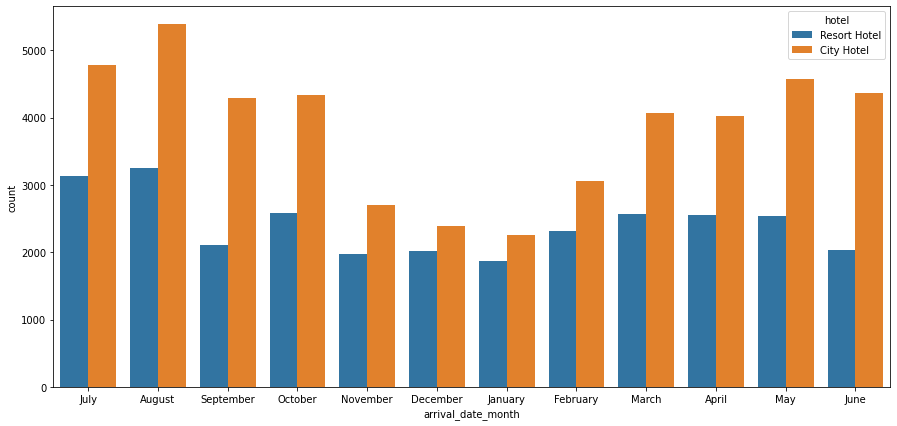

In [27]:
fig = plt.figure(figsize=(15,7))
sns.countplot(data=booked, x = 'arrival_date_month', hue='hotel')

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

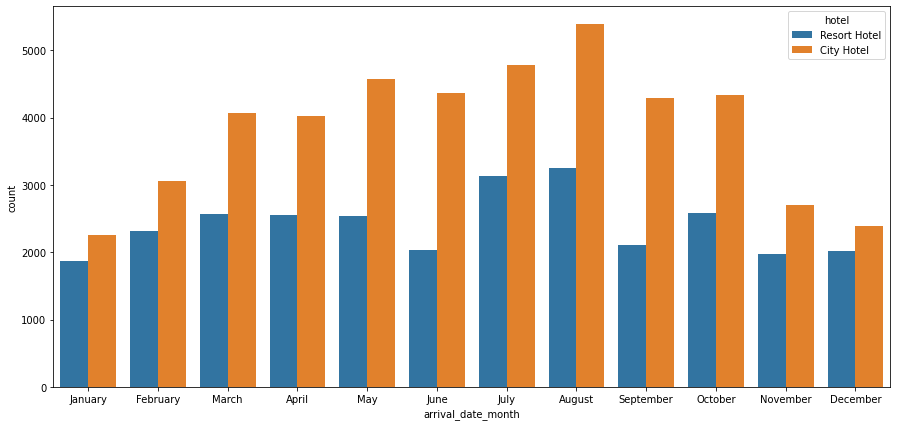

In [28]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
fig = plt.figure(figsize=(15,7))
sns.countplot(data=booked, x = 'arrival_date_month', hue='hotel', order=months)

<AxesSubplot:xlabel='total_nights', ylabel='count'>

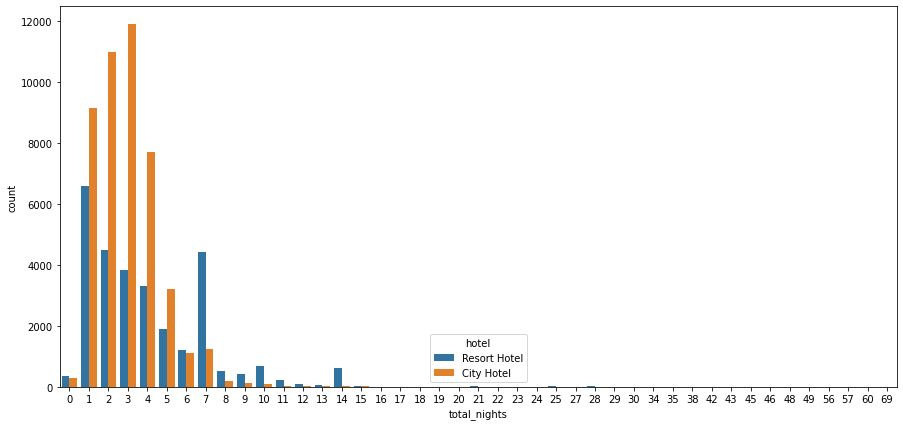

In [29]:
# Total nights
fig = plt.figure(figsize=(15,7))
sns.countplot(data=booked, x='total_nights', hue='hotel')

<AxesSubplot:xlabel='arrival_date_day_of_month', ylabel='count'>

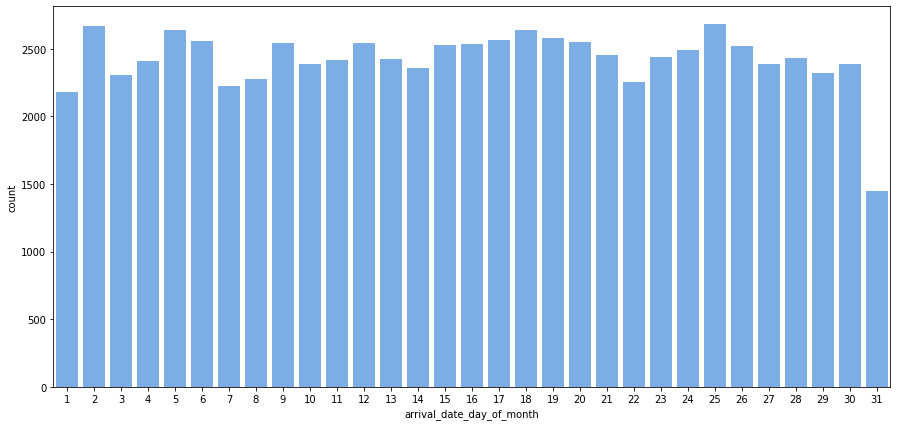

In [30]:
fig = plt.figure(figsize=(15,7))
sns.countplot(data=booked, x = 'arrival_date_day_of_month', palette= ["#6aacf7"])

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

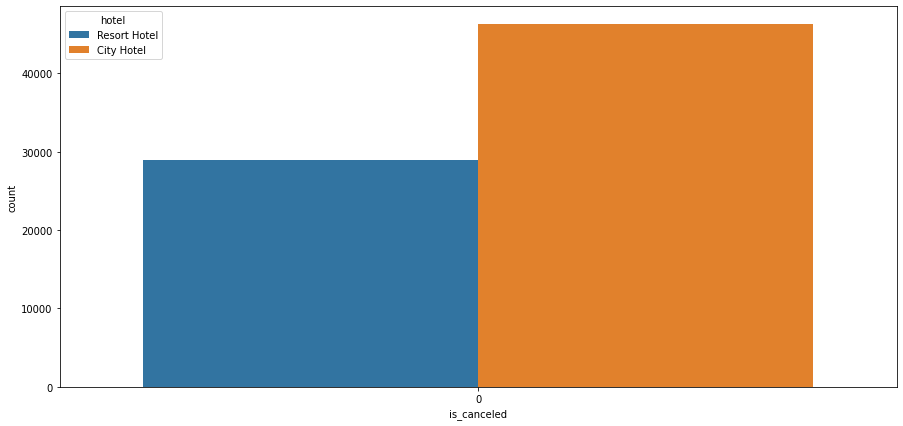

In [32]:
fig = plt.figure(figsize=(15,7))
sns.countplot(data=booked, x = 'is_canceled', hue='hotel')

In [10]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [55]:
categorical_col = ['customer_type','deposit_type', 'distribution_channel', 'market_segment', 'hotel']

In [56]:
onehotencoder = OneHotEncoder(use_cat_names=True)

transformed_data = onehotencoder.fit_transform(df[categorical_col])

encoded = pd.DataFrame(transformed_data, index=df.index)

final_df = pd.concat([df, encoded], axis=1)
final_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Direct,market_segment_Corporate,market_segment_Online TA,market_segment_Offline TA/TO,market_segment_Complementary,market_segment_Groups,market_segment_Undefined,market_segment_Aviation,hotel_Resort Hotel,hotel_City Hotel
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1,0,0,0,0,0,0,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1,0,0,0,0,0,0,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,1,0,0,0,0,0,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,1,0,0,0,0,0,1,0


In [55]:
final_df.shape

(119390, 55)

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [57]:
final_df['Date'] = pd.to_datetime(final_df['reservation_status_date'])
final_df.drop(columns='reservation_status_date', inplace=True)
final_df.set_index('Date', inplace=True)

In [58]:
final_df.index.min(), final_df.index.max()

(Timestamp('2014-10-17 00:00:00'), Timestamp('2017-09-14 00:00:00'))

In [59]:
def wrangle(filepath):
  df = pd.read_csv(filepath)

  # reservation_status_date set to index
  #df = pd.read_csv(filepath,
   #              parse_dates=['reservation_status_date'],
    #             index_col='reservation_status_date').sort_index()
  # Null Values
  final_df['agent'].fillna(0, inplace=True),
  final_df['company'].fillna(0, inplace=True)
  final_df['children'].fillna(0, inplace=True)
  final_df['country'].fillna('unknown', inplace=True)
  final_df.drop(columns=['customer_type', 'hotel', 'deposit_type', 'distribution_channel', 'market_segment' ], inplace=True)
  # Clean binary encoded columns
  categorical_cols = final_df.select_dtypes('object').columns
  # use categorical columns which are basically binary encoded
  binary_cols = [col for col in categorical_cols if final_df[col].nunique() < 13]
  for col in binary_cols:
    final_df[col] = final_df[col].apply(lambda x: 1 if isinstance(x, str) else 0)
  # High Cardinality Categorical Values
  threshold = 25
  high_card_cols = [col for col in categorical_cols
                    if final_df[col].nunique() > threshold]
  final_df.drop(high_card_cols, axis=1, inplace=True)
  # Drop rows where adults, children, and babies are all = 0 
  final_df.drop(final_df[(final_df.adults == 0) & (final_df.children == 0) & (final_df.babies == 0)].index, inplace=True)

  return final_df

In [60]:
final_df = wrangle(DATA_PATH + 'hotel_bookings.csv')

In [40]:
final_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Direct,market_segment_Corporate,market_segment_Online TA,market_segment_Offline TA/TO,market_segment_Complementary,market_segment_Groups,market_segment_Undefined,market_segment_Aviation,hotel_Resort Hotel,hotel_City Hotel
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,0,342,2015,1,27,1,0,0,2,0.0,...,1,0,0,0,0,0,0,0,1,0
2015-07-01,0,737,2015,1,27,1,0,0,2,0.0,...,1,0,0,0,0,0,0,0,1,0
2015-07-02,0,7,2015,1,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,1,0
2015-07-02,0,13,2015,1,27,1,0,1,1,0.0,...,0,1,0,0,0,0,0,0,1,0
2015-07-03,0,14,2015,1,27,1,0,2,2,0.0,...,0,0,1,0,0,0,0,0,1,0


In [41]:
final_df.shape

(98785, 48)

In [42]:
final_df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
total_nights                      0
customer_type_Transient           0
customer_type_Contract      

In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98785 entries, 2015-07-01 to 2017-09-07
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     98785 non-null  int64  
 1   lead_time                       98785 non-null  int64  
 2   arrival_date_year               98785 non-null  int64  
 3   arrival_date_month              98785 non-null  int64  
 4   arrival_date_week_number        98785 non-null  int64  
 5   arrival_date_day_of_month       98785 non-null  int64  
 6   stays_in_weekend_nights         98785 non-null  int64  
 7   stays_in_week_nights            98785 non-null  int64  
 8   adults                          98785 non-null  int64  
 9   children                        98785 non-null  float64
 10  babies                          98785 non-null  int64  
 11  meal                            98785 non-null  int64  
 12  is_repeated_gue

# Split Data

In [61]:
# Split Data
target = 'is_canceled'
y = final_df[target]
X = final_df.drop(target, axis=1)

In [44]:
X.shape, y.shape

((98785, 47), (98785,))

<AxesSubplot:>

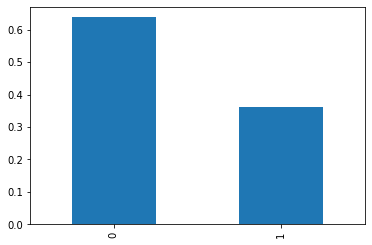

In [45]:
y.value_counts(normalize=True).plot(kind='bar')

In [46]:
y.value_counts(normalize=True) * 100

0    63.769803
1    36.230197
Name: is_canceled, dtype: float64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [62]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_1,y_1,test_size = 0.5,train_size =0.5, random_state=42)

In [65]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(39514, 47)
(39514, 47)
(19757, 47)
(39514,)
(39514,)
(19757,)


In [63]:
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score:', baseline_acc * 100)

Baseline Accuracy Score: 63.92670952067622


In [64]:
rf = make_pipeline(
    RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
)

rf.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [66]:
training_acc = (accuracy_score(y_train, rf.predict(X_train))* 100)
val_acc = (accuracy_score(y_val, rf.predict(X_val))* 100)

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 99.33694386799615
Validation Accuracy Score: 86.24538138381334


In [67]:
y_pred_rf = rf.predict(X_val)

acc_rf = accuracy_score(y_val, y_pred_rf)
conf = confusion_matrix(y_val, y_pred_rf)
rf_report = classification_report(y_val, y_pred_rf)

print(f"Accuracy Score of Random Forest is : {acc_rf}")
print(f"Classification Report : \n{rf_report}")

Accuracy Score of Random Forest is : 0.8624791213240877
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     25180
           1       0.86      0.74      0.80     14334

    accuracy                           0.86     39514
   macro avg       0.86      0.84      0.85     39514
weighted avg       0.86      0.86      0.86     39514



In [68]:
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

lr.fit(X_train, y_train);

In [69]:
print('Training Accuracy (LR):', lr.score(X_train, y_train))
print('Validation Accuracy (LR):', lr.score(X_val, y_val))

Training Accuracy (LR): 0.8090044035025561
Validation Accuracy (LR): 0.8100167029407299


In [70]:
y_pred_lr = lr.predict(X_val)

acc_lr = accuracy_score(y_val, y_pred_lr)
conf_lr = confusion_matrix(y_val, y_pred_lr)
lr_report = classification_report(y_val, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Classification Report : \n{lr_report}")

Accuracy Score of Logistic Regression is : 0.8100167029407299
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     25180
           1       0.84      0.59      0.69     14334

    accuracy                           0.81     39514
   macro avg       0.82      0.76      0.78     39514
weighted avg       0.81      0.81      0.80     39514



<AxesSubplot:>

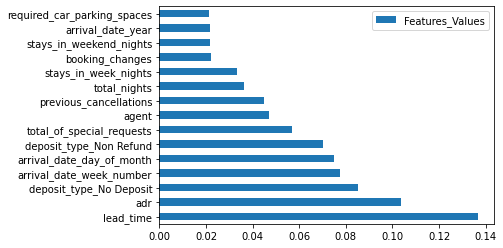

In [71]:
feature_impo = rf['randomforestclassifier'].feature_importances_
feature_names = X_train.columns
feature_impo_df = pd.DataFrame(feature_impo,
                               columns=['Features_Values'],
                               index=feature_names).sort_values(by='Features_Values', ascending=False)
feature_impo_df.head(15).plot(kind='barh')

In [72]:
# Load xgboost and fit the model
from xgboost import XGBClassifier

xg_classifier = XGBClassifier(n_estimators=200, max_depth=10, random_state=42, eval_metric='merror')

xg_classifier.fit(X_train,y_train)

print('Validation Accuracy: Adaboost', xg_classifier.score(X_val, y_val))

Validation Accuracy: Adaboost 0.8567343220124513


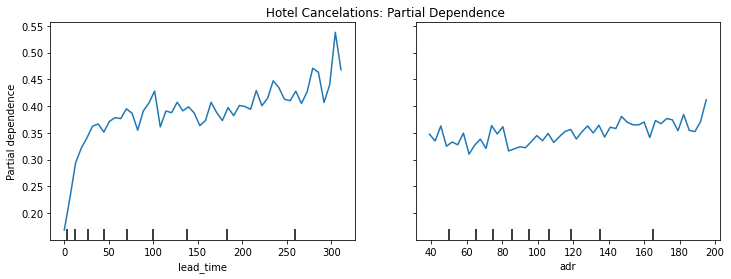

In [73]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
PartialDependenceDisplay.from_estimator(xg_classifier, feature_names=X.columns, 
                        features=['lead_time','adr'], 
                        X=X, grid_resolution=50, ax=ax);

ax.set_title('Hotel Cancelations: Partial Dependence')

plt.show()

In [74]:
!pip install shap
import shap
# Shap explainer initilization 
shap_ex = shap.TreeExplainer(xg_classifier) 

# Determine Shap values 
shap_values = shap_ex.shap_values(X)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.7 MB/s eta 0:00:00


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [75]:

# Calculate the shapley values
shap_values = shap_ex.shap_values(X)
  
# Initialize the plot 
shap.initjs() 

shap.force_plot(shap_ex.expected_value, shap_values[50,:], X.iloc[50,:])